In [2]:
include("MDPModelFunctions.jl")

simulate_episode (generic function with 1 method)

In [3]:
using StatsBase
using PythonPlot


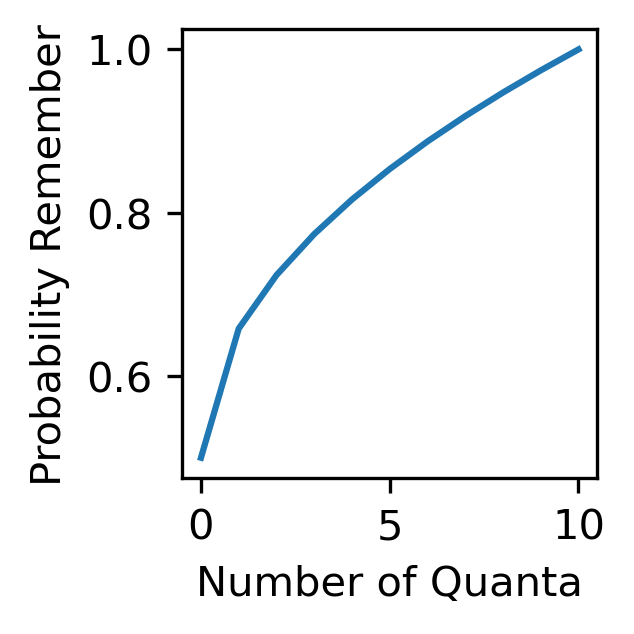

Python: None

In [34]:
x = Int.(0:10)


fig,ax = subplots(1,dpi=300, figsize=(2,2), constrained_layout=true)
ax.plot(Int.(x),prob_remember(x))
ax.set_xlabel("Number of Quanta")
ax.set_ylabel("Probability Remember")

savefig("Quanta_Prob_Remember.png")

In [13]:
# set up parameters

N_Quanta = 10

N_Objects = 3

object_probe_probs = 1/N_Objects*ones(N_Objects)

exp_num_time_steps = 10
per_timestep_probe_prob = 1/exp_num_time_steps

S = generate_all_states(N_Quanta,N_Objects)
policy, V = value_iteration(S,object_probe_probs, per_timestep_probe_prob);

#### Simulate delayed memory test

Varying Epsilon

In [ ]:
N_Trials = 2000

N_TimeSteps = 2000
epsilon_vals = [0, .33, .66, 1]

N_epsilon = length(epsilon_vals)

prob_remember_each_stim = zeros(N_epsilon, N_Trials, N_TimeSteps, N_Objects)


for epsilon_idx = 1:N_epsilon
    
    epsilon = epsilon_vals[epsilon_idx]

    print("epsilon: " , epsilon)
    
    for trial_idx = 1:N_Trials

        state_history, action_history = simulate_episode(policy, epsilon, N_TimeSteps, S);

        prob_remember_each_stim[epsilon_idx, trial_idx, :, :] = prob_remember(state_history);
    end
    
end

epsilon: 0.0epsilon: 0.33

In [6]:
# prob_remember_each_stim

In [ ]:
# probably when there's a tie, it's always picking the first one...

fig,ax = subplots(1,4,figsize=(10,4), constrained_layout=true, sharey=true)

for epsilon_idx in 1:N_epsilon

    mean_prob_remember = dropdims(mean(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    std_prob_remember =  dropdims(std(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    
    for obj_idx in 1:N_Objects
    
        ax[epsilon_idx-1].plot(1:N_TimeSteps, mean_prob_remember[:,obj_idx], label = string("Obj. ", obj_idx))
        # ax[epsilon_idx-1].errorbar(1:N_TimeSteps, mean_prob_remember[:,obj_idx], yerr = std_prob_remember[:,obj_idx]./sqrt(N_Trials), label = string("Obj. ", obj_idx))

    end
    #ax[epsilon_idx-1].set_ylim(.3,.6)
    ax[epsilon_idx-1].set_xlabel("Time Step")
    ax[epsilon_idx-1].legend()
    ax[epsilon_idx-1].set_title(string("Epsilon: ", epsilon_vals[epsilon_idx]))

end
ax[0].set_ylabel("Prob Remember")


Vary number of quanta

In [8]:
N_Trials = 1000


N_TimeSteps = 2000

NQ_vals = [3,6,12]

N_nq = length(NQ_vals)

prob_remember_each_stim = zeros(N_nq, N_Trials, N_TimeSteps, N_Objects)

for NQ_idx = 1:N_nq
    
    epsilon = .5
    
    Num_Quanta = NQ_vals[NQ_idx]    
    print(Num_Quanta)
    
    S = generate_all_states(Num_Quanta,N_Objects)
    policy, V = value_iteration(S,object_probe_probs, per_timestep_probe_prob);

    for trial_idx = 1:N_Trials

        state_history, action_history = simulate_episode(policy, epsilon, N_TimeSteps, S);

        prob_remember_each_stim[NQ_idx, trial_idx, :, :] = prob_remember(state_history);
    end
    
end

3

LoadError: InterruptException:

In [9]:
fig,ax = subplots(1,3,figsize=(10,4), constrained_layout=true, sharey = true)


for NQ_idx = 1:N_nq

    mean_prob_remember = dropdims(mean(prob_remember_each_stim[NQ_idx,:,:,:], dims=1),dims=1)
    std_prob_remember =  dropdims(std(prob_remember_each_stim[NQ_idx,:,:,:], dims=1),dims=1)
    
    for obj_idx in 1:N_Objects
        
    
        ax[NQ_idx-1].plot(1:N_TimeSteps, mean_prob_remember[:,obj_idx], label = string("Obj. ", obj_idx))
        # ax[NQ_idx-1].errorbar(1:N_TimeSteps, mean_prob_remember[:,obj_idx], yerr = 2*std_prob_remember[:,obj_idx]/sqrt(N_Trials), label = string("Obj. ", obj_idx))

    end
    
    
    
    ax[NQ_idx-1].set_xlabel("Time Step")
    ax[NQ_idx-1].legend()
    ax[NQ_idx-1].set_title(string("Num. Quanta: ", NQ_vals[NQ_idx]))

end
ax[0].set_ylabel("Prob Remember")


LoadError: InterruptException:

### Retro-cue

Vary epsilon

In [10]:
N_Trials = 1000

N_TimeSteps_Pre = 500
N_TimeSteps_Post = 500
N_TimeSteps = N_TimeSteps_Pre + N_TimeSteps_Post

Num_Quanta = 8
N_Objects = 3
epsilon = .5

S = generate_all_states(Num_Quanta,N_Objects)

# change policy to probabilistic
policy_pre, V = value_iteration(S,1/N_Objects*ones(N_Objects), per_timestep_probe_prob);
policy_post, V = value_iteration(S,[.1, .8, .1], per_timestep_probe_prob);


epsilon_vals = [0, .33, .66, 1]

N_epsilon = length(epsilon_vals)

prob_remember_each_stim = zeros(N_nq, N_Trials, N_TimeSteps, N_Objects)

for epsilon_idx = 1:N_nq

    epsilon = epsilon_vals[epsilon_idx]

    print("epsilon: " , epsilon)
    
    for trial_idx = 1:N_Trials

        #  -- need a start state... 
        state_history_pre, action_history = simulate_episode(policy_pre, epsilon, N_TimeSteps_Pre, S);

        state_history_post, action_history = simulate_episode(policy_post, epsilon, N_TimeSteps_Post, S, s = state_history_pre[end,:]);

        state_history = [state_history_pre; state_history_post]

        prob_remember_each_stim[epsilon_idx, trial_idx, :, :] = prob_remember(state_history);
    end
    
end



LoadError: InterruptException:

In [11]:
# probably when there's a tie, it's always picking the first one...

fig,ax = subplots(1,4,figsize=(10,4), constrained_layout=true, sharey = true, sharex = true)


for epsilon_idx in 1:N_epsilon

    mean_prob_remember = dropdims(mean(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    # std_prob_remember =  dropdims(std(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    
    for obj_idx in 1:N_Objects
    
        ax[epsilon_idx-1].plot(1:N_TimeSteps, mean_prob_remember[:,obj_idx], label = string("Obj. ", obj_idx))

    end
    ax[epsilon_idx-1].set_xlabel("Time Step")
    ax[epsilon_idx-1].legend()
    ax[epsilon_idx-1].set_title(string("Epsilon: ", epsilon_vals[epsilon_idx]))

end
ax[0].set_ylabel("Prob Remember")
# ax[0].set_ylim(.1,.9)
# ax[0].set_xlim(5,1500)


LoadError: InterruptException:

Vary Num. Quanta

In [12]:
N_Trials = 1000

N_TimeSteps_Pre = 500
N_TimeSteps_Post = 500
N_TimeSteps = N_TimeSteps_Pre + N_TimeSteps_Post

NQ_vals = [3,6,12]

N_nq = length(NQ_vals)

prob_remember_each_stim = zeros(N_nq, N_Trials, N_TimeSteps, N_Objects)

for NQ_idx = 1:N_nq
    
    epsilon = .5
    
    Num_Quanta = NQ_vals[NQ_idx]    
    print(Num_Quanta)
    
    S = generate_all_states(Num_Quanta,N_Objects)
    # change policy to probabilistic
    policy_pre, V = value_iteration(S,1/N_Objects*ones(N_Objects), per_timestep_probe_prob);
    policy_post, V = value_iteration(S,[.1, .8, .1], per_timestep_probe_prob);
    
    for trial_idx = 1:N_Trials

        #  -- need a start state... 
        state_history_pre, action_history = simulate_episode(policy_pre, epsilon, N_TimeSteps_Pre, S);

        state_history_post, action_history = simulate_episode(policy_post, epsilon, N_TimeSteps_Post, S, s = state_history_pre[end,:]);

        state_history = [state_history_pre; state_history_post]

        prob_remember_each_stim[NQ_idx, trial_idx, :, :] = prob_remember(state_history);
    end
    
end

3

LoadError: InterruptException:

In [13]:
fig,ax = subplots(1,3,figsize=(10,4), constrained_layout=true, sharey = true)


for NQ_idx = 1:N_nq

    mean_prob_remember = dropdims(mean(prob_remember_each_stim[NQ_idx,:,:,:], dims=1),dims=1)
    std_prob_remember =  dropdims(std(prob_remember_each_stim[NQ_idx,:,:,:], dims=1),dims=1)
    
    for obj_idx in 1:N_Objects
        
    
        ax[NQ_idx-1].plot(1:N_TimeSteps, mean_prob_remember[:,obj_idx], label = string("Obj. ", obj_idx))
        # ax[NQ_idx-1].errorbar(1:N_TimeSteps, mean_prob_remember[:,obj_idx], yerr = 2*std_prob_remember[:,obj_idx]/sqrt(N_Trials), label = string("Obj. ", obj_idx))

    end
    
    
    
    ax[NQ_idx-1].set_xlabel("Time Step")
    ax[NQ_idx-1].legend()
    ax[NQ_idx-1].set_title(string("Num. Quanta: ", NQ_vals[NQ_idx]))

end
ax[0].set_ylabel("Prob Remember")


LoadError: InterruptException:

## Pre-cue

Vary Epsilon

In [14]:
N_Trials = 1000

N_TimeSteps_Pre = 1000
N_TimeSteps_Post = 500
N_TimeSteps = N_TimeSteps_Post

Num_Quanta = 8
N_Objects = 3
epsilon = .5

S = generate_all_states(Num_Quanta,N_Objects)

# change policy to probabilistic
policy_pre, V = value_iteration(S,1/N_Objects*ones(N_Objects), per_timestep_probe_prob);
policy_post, V = value_iteration(S,[.1, .8, .1], per_timestep_probe_prob);


epsilon_vals = [0, .33, .66, 1]

N_epsilon = length(epsilon_vals)

prob_remember_each_stim = zeros(N_epsilon, N_Trials, N_TimeSteps, N_Objects)

for epsilon_idx = 1:N_epsilon

    epsilon = epsilon_vals[epsilon_idx]

    print("epsilon: " , epsilon)
    
    for trial_idx = 1:N_Trials

        #  -- need a start state... 
        # state_history_pre, action_history = simulate_episode(policy_pre, epsilon, N_TimeSteps_Pre, S);

        state_history_post, action_history = simulate_episode(policy_post, epsilon, N_TimeSteps_Post, S);

        #state_history = [state_history_pre; state_history_post]

        prob_remember_each_stim[epsilon_idx, trial_idx, :, :] = prob_remember(state_history_post);
    end
    
end



epsilon: 0.0epsilon: 0.33epsilon: 0.66epsilon: 1.0

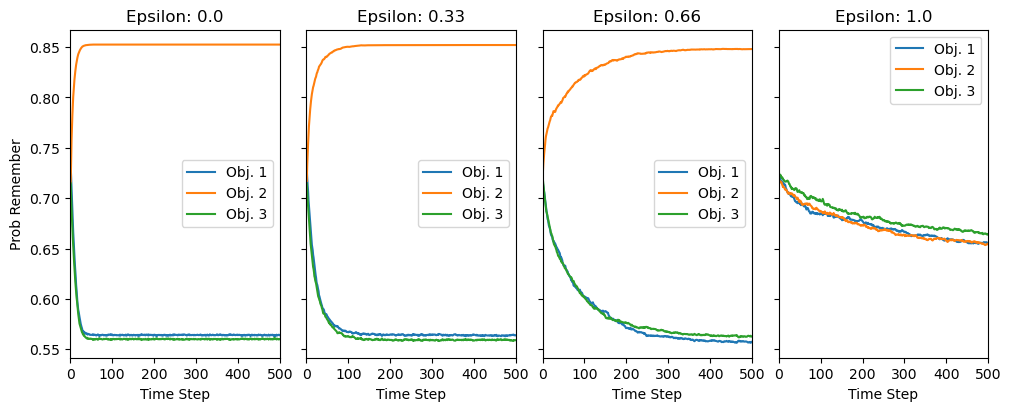

Python: (0.0, 500.0)

In [15]:
# probably when there's a tie, it's always picking the first one...

fig,ax = subplots(1,4,figsize=(10,4), constrained_layout=true, sharey = true, sharex = true)


for epsilon_idx in 1:N_epsilon

    mean_prob_remember = dropdims(mean(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    # std_prob_remember =  dropdims(std(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    
    for obj_idx in 1:N_Objects
    
        ax[epsilon_idx-1].plot(1:N_TimeSteps, mean_prob_remember[:,obj_idx], label = string("Obj. ", obj_idx))

    end
    ax[epsilon_idx-1].set_xlabel("Time Step")
    ax[epsilon_idx-1].legend()
    ax[epsilon_idx-1].set_title(string("Epsilon: ", epsilon_vals[epsilon_idx]))

end
ax[0].set_ylabel("Prob Remember")
# ax[0].set_ylim(-.1,1)
ax[0].set_xlim(0,500)


In [16]:
N_Trials = 1000

N_TimeSteps_Pre = 500
N_TimeSteps_Post = 500
N_TimeSteps = N_TimeSteps_Post

NQ_vals = [3,6,12]

N_nq = length(NQ_vals)

prob_remember_each_stim = zeros(N_nq, N_Trials, N_TimeSteps, N_Objects)

for NQ_idx = 1:N_nq
    
    epsilon = .5
    
    Num_Quanta = NQ_vals[NQ_idx]    
    print(Num_Quanta)
    
    S = generate_all_states(Num_Quanta,N_Objects)
    # change policy to probabilistic
    policy_pre, V = value_iteration(S,1/N_Objects*ones(N_Objects), per_timestep_probe_prob);
    policy_post, V = value_iteration(S,[.1, .8, .1], per_timestep_probe_prob);
    
    for trial_idx = 1:N_Trials

        #  -- need a start state... 
        
        state_history_post, action_history = simulate_episode(policy_post, epsilon, N_TimeSteps_Post, S);
        


        prob_remember_each_stim[NQ_idx, trial_idx, :, :] = prob_remember(state_history_post);
    end
    
end

3612

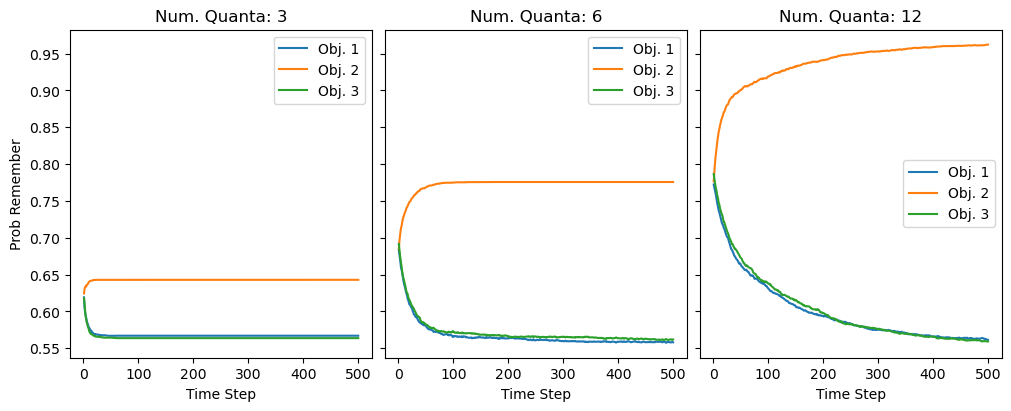

Python: Text(24.000000000000007, 0.5, 'Prob Remember')

In [17]:
fig,ax = subplots(1,3,figsize=(10,4), constrained_layout=true, sharey = true)


for NQ_idx = 1:N_nq

    mean_prob_remember = dropdims(mean(prob_remember_each_stim[NQ_idx,:,:,:], dims=1),dims=1)
    std_prob_remember =  dropdims(std(prob_remember_each_stim[NQ_idx,:,:,:], dims=1),dims=1)
    
    for obj_idx in 1:N_Objects
        
    
        ax[NQ_idx-1].plot(1:N_TimeSteps, mean_prob_remember[:,obj_idx], label = string("Obj. ", obj_idx))
        # ax[NQ_idx-1].errorbar(1:N_TimeSteps, mean_prob_remember[:,obj_idx], yerr = 2*std_prob_remember[:,obj_idx]/sqrt(N_Trials), label = string("Obj. ", obj_idx))

    end
    
    
    
    ax[NQ_idx-1].set_xlabel("Time Step")
    ax[NQ_idx-1].legend()
    ax[NQ_idx-1].set_title(string("Num. Quanta: ", NQ_vals[NQ_idx]))

end
ax[0].set_ylabel("Prob Remember")


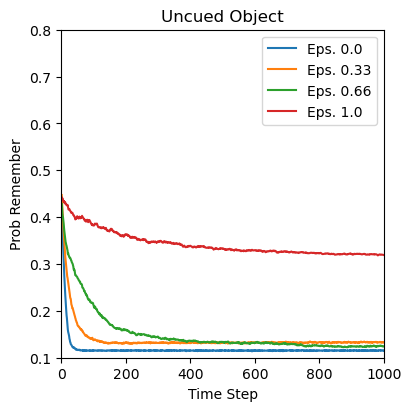

Python: Text(0.5, 1.0, 'Uncued Object')

In [130]:
fig,ax = subplots(1,figsize=(4,4), constrained_layout=true, sharey = true, sharex = true)


for epsilon_idx in 1:N_epsilon

    mean_prob_remember = dropdims(mean(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    # std_prob_remember =  dropdims(std(prob_remember_each_stim[epsilon_idx,:,:,:], dims=1),dims=1)
    
    
    ax.plot(1:N_TimeSteps, mean_prob_remember[:,1], label = string("Eps. ", epsilon_vals[epsilon_idx]))

    ax.set_xlabel("Time Step")
    ax.legend()
    # ax.set_title(string("Epsilon: ", epsilon_vals[epsilon_idx]))

end
ax.set_ylabel("Prob Remember")
ax.set_ylim(.1, .8)
ax.set_xlim(0,1000)
ax.set_title("Uncued Object")


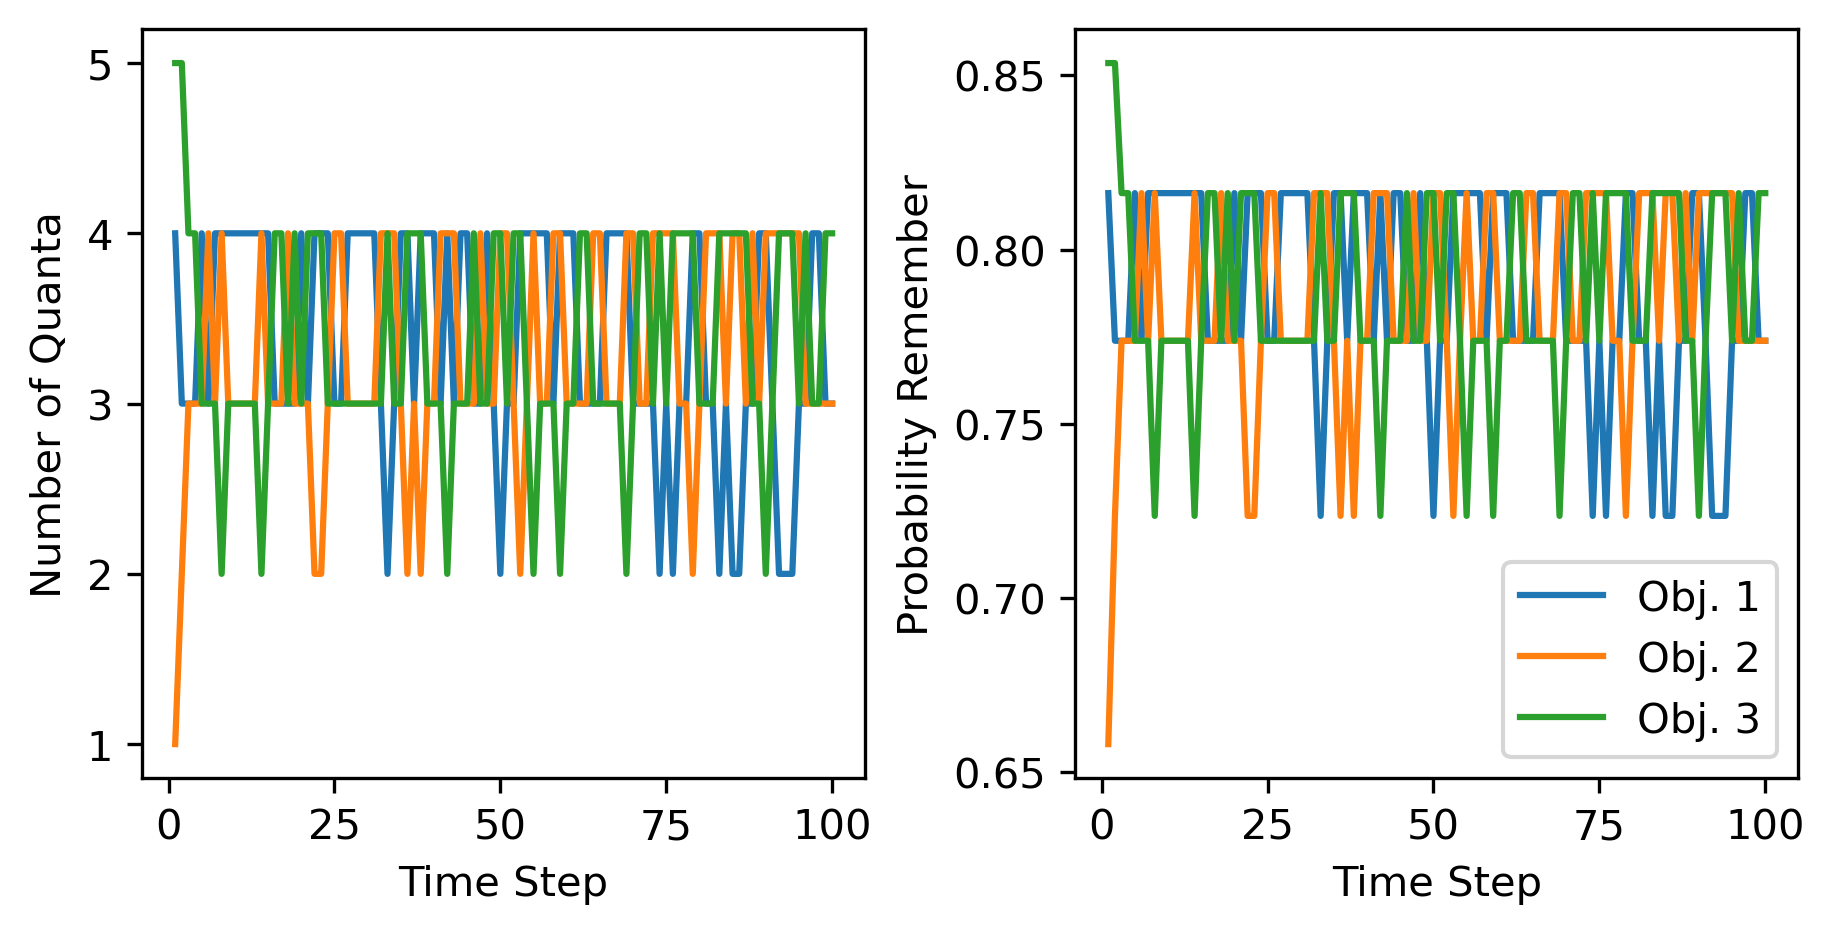

Python: None

In [22]:
# set up parameters
fig,ax = subplots(1,2, figsize=(6,3), dpi = 300, constrained_layout=true, sharey = false, sharex = true)

N_Quanta = 10

N_Objects = 3

object_probe_probs = 1/N_Objects*ones(N_Objects)

exp_num_time_steps = 10
per_timestep_probe_prob = 1/exp_num_time_steps

S = generate_all_states(N_Quanta,N_Objects)
policy, V = value_iteration(S,object_probe_probs, per_timestep_probe_prob);


N_TimeSteps = 100

epsilon = 0

state_history, action_history = simulate_episode(policy, epsilon, N_TimeSteps, S);

for obj_idx in 1:N_Objects


    ax[0].plot(1:N_TimeSteps, state_history[:,obj_idx], label = string("Obj. ", obj_idx))
    ax[1].plot(1:N_TimeSteps, prob_remember(state_history[:,obj_idx]), label = string("Obj. ", obj_idx))


end

ax[0].set_ylabel("Number of Quanta")
ax[1].set_ylabel("Probability Remember")
ax[0].set_xlabel("Time Step")
ax[1].set_xlabel("Time Step")
ax[1].legend()

savefig("Equal_Probe_Prob_Example.png")

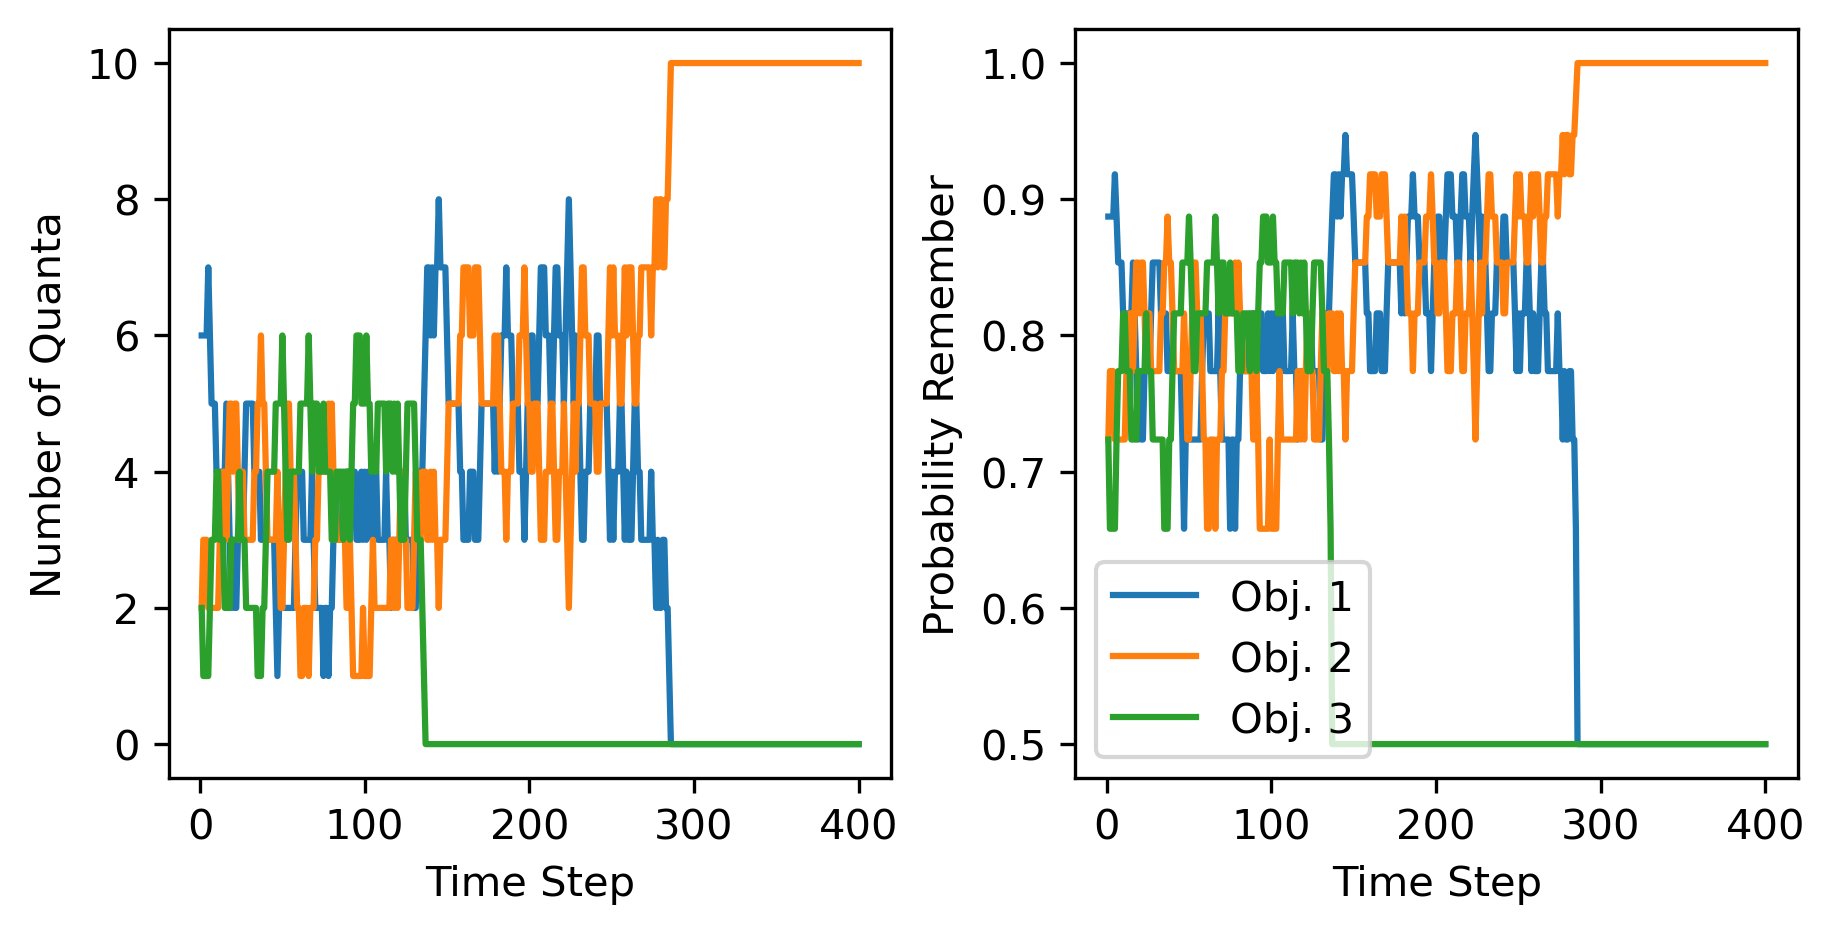

Python: None

In [27]:
# set up parameters
fig,ax = subplots(1,2, figsize=(6,3), dpi = 300, constrained_layout=true, sharey = false, sharex = true)

N_Quanta = 10

N_Objects = 3

object_probe_probs = 1/N_Objects*ones(N_Objects)

exp_num_time_steps = 10
per_timestep_probe_prob = 1/exp_num_time_steps

S = generate_all_states(N_Quanta,N_Objects)
policy, V = value_iteration(S,object_probe_probs, per_timestep_probe_prob);


N_TimeSteps = 400

epsilon = 1

state_history, action_history = simulate_episode(policy, epsilon, N_TimeSteps, S);

for obj_idx in 1:N_Objects


    ax[0].plot(1:N_TimeSteps, state_history[:,obj_idx], label = string("Obj. ", obj_idx))
    ax[1].plot(1:N_TimeSteps, prob_remember(state_history[:,obj_idx]), label = string("Obj. ", obj_idx))


end

ax[0].set_ylabel("Number of Quanta")
ax[1].set_ylabel("Probability Remember")
ax[0].set_xlabel("Time Step")
ax[1].set_xlabel("Time Step")
ax[1].legend()

savefig("Random_Policy.png")

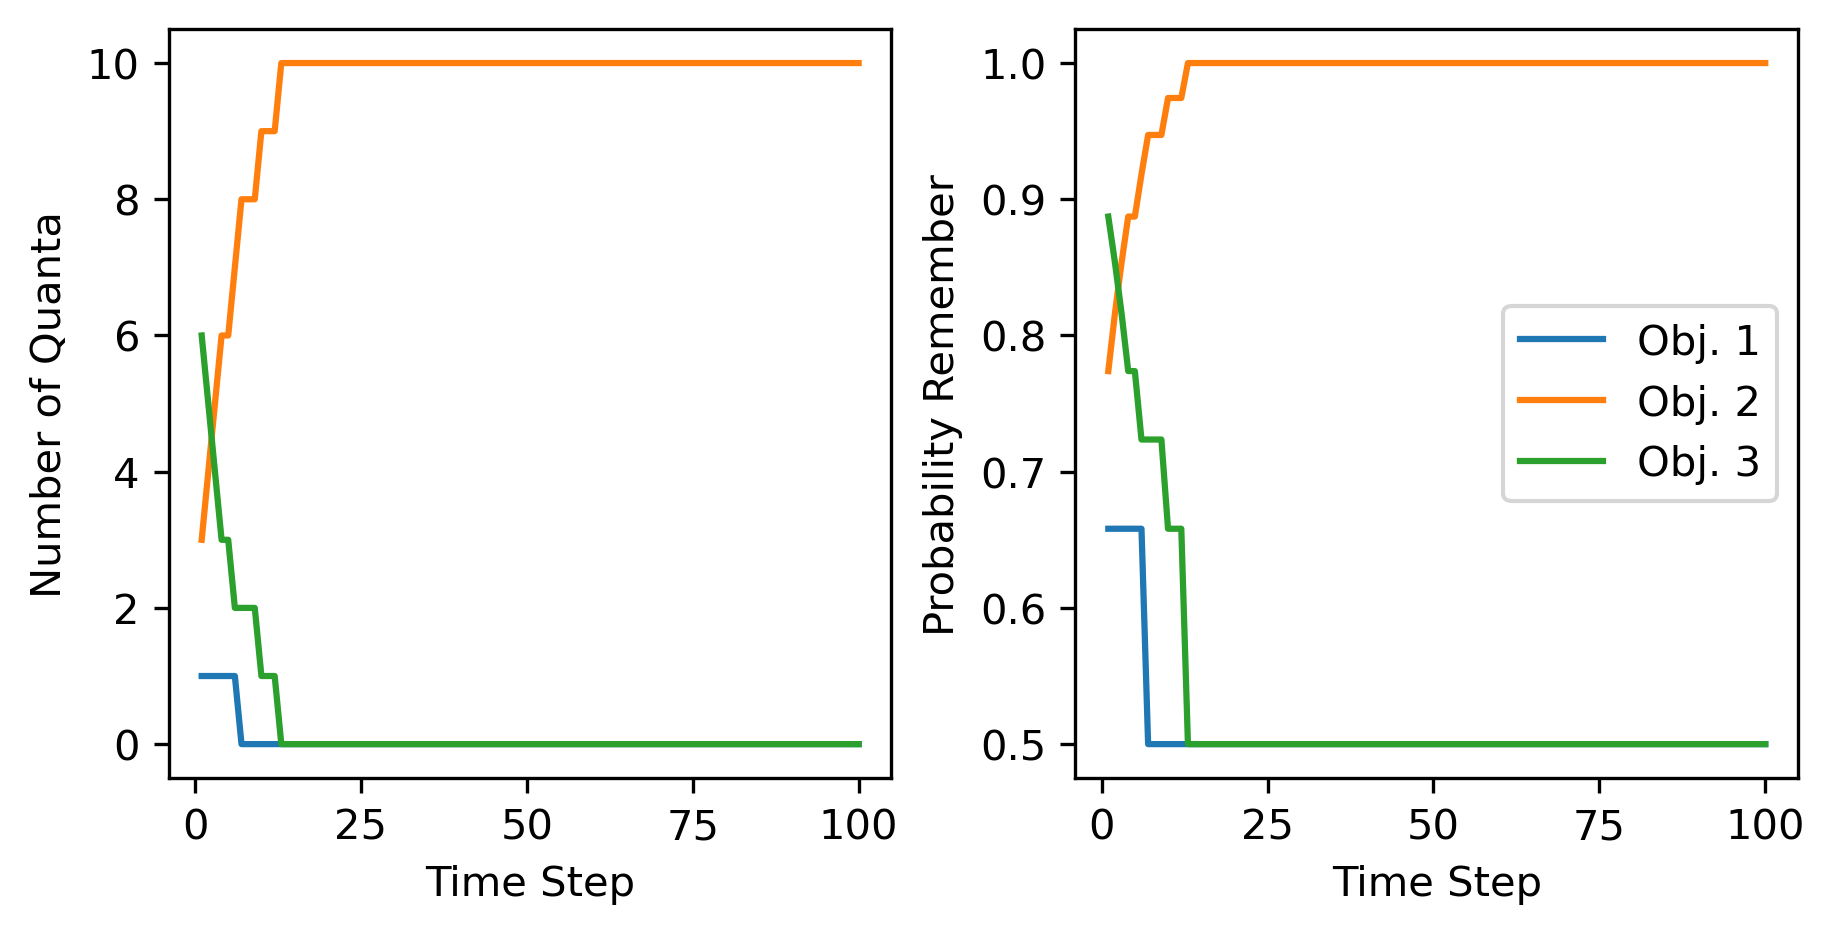

Python: None

In [33]:
# set up parameters
fig,ax = subplots(1,2, figsize=(6,3), dpi = 300, constrained_layout=true, sharey = false, sharex = true)

N_Quanta = 10

N_Objects = 3

exp_num_time_steps = 10
per_timestep_probe_prob = 1/exp_num_time_steps

S = generate_all_states(N_Quanta,N_Objects)
policy, V = value_iteration(S,[.1,.8,.1], per_timestep_probe_prob);


N_TimeSteps = 100

    
epsilon = 0

state_history, action_history = simulate_episode(policy, epsilon, N_TimeSteps, S);

for obj_idx in 1:N_Objects


    ax[0].plot(1:N_TimeSteps, state_history[:,obj_idx], label = string("Obj. ", obj_idx))
    ax[1].plot(1:N_TimeSteps, prob_remember(state_history[:,obj_idx]), label = string("Obj. ", obj_idx))


end


ax[0].set_ylabel("Number of Quanta")
ax[1].set_ylabel("Probability Remember")
ax[0].set_xlabel("Time Step")
ax[1].set_xlabel("Time Step")
ax[1].legend()


savefig("Cued_Item.png")

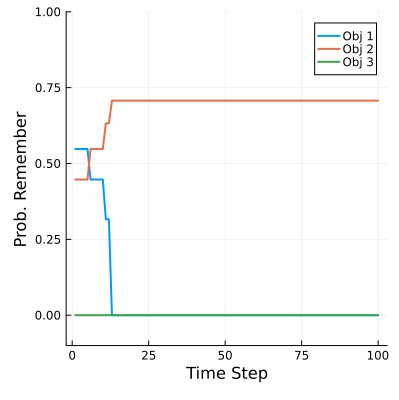

In [107]:
plot(1:NT, prob_remember(state_history), label = ["Obj 1" "Obj 2" "Obj 3"], linewidth = 2, windowsize = (400,400))
ylims!(-.1,1)
ylabel!("Prob. Remember")
xlabel!("Time Step")

In [49]:
NT = 100
epsilon = 1
state_history, action_history = simulate_episode(policy, epsilon, NT, S)



LoadError: BoundsError: attempt to access 55×3 Matrix{Float64} at index [56, 1:3]

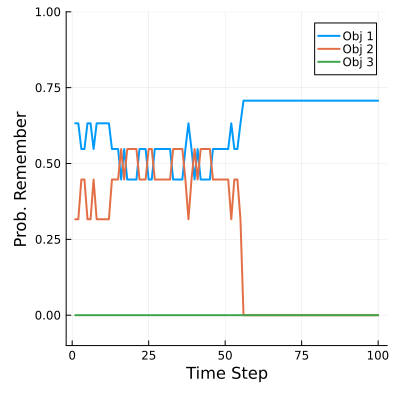

In [90]:
plot(1:NT, prob_remember(state_history), label = ["Obj 1" "Obj 2" "Obj 3"], linewidth = 2, windowsize = (400,400))
ylims!(-.1,1)
ylabel!("Prob. Remember")
xlabel!("Time Step")